# **Task #4**

In [47]:
#import libraries
!pip install pyspellchecker
import re
import string
import nltk
import spacy
import gensim
import numpy as np
import pandas as pd
import seaborn as sns;
import plotly.express as px
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Loading data

In [48]:
from google.colab import drive
drive.mount('/content/drive/')

file = open('/content/drive/My Drive/11-0.txt', 'rt')
text = file.read()
file.close()


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Preprocessing data

In [49]:
# split into words by white space
words = text.split()

# normalizing case
words = [word.lower() for word in words]

# removing punctuation and digits
signs = string.punctuation
for i in range(10):
    signs += str(i)

signs += str('“')
signs += str('”')
signs += str('')
signs += str('’')
signs += str('—')

table = str.maketrans('', '', signs)
words = [w.translate(table) for w in words]
words = [word for word in words if len(word) > 0]

# lemmatization
sp = spacy.load('en_core_web_sm')
temp_text = ''
for w in words:
    temp_text += str(w)
    temp_text += str(' ')
words = [token.lemma_ for token in sp(temp_text)]

# removing stop words
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
words = [w for w in words if w != '-PRON-' and w != "'" ]

Splitting text on chapters

In [50]:
text2 = ''
for w in words:
    text2 += str(w)
    text2 += str(' ')

text2 = re.split(r"chapter", text2)
c_1 = text2[13]
c_2 = text2[14]
c_3 = text2[15]
c_4 = text2[16]
c_5 = text2[17]
c_6 = text2[18]
c_7 = text2[19]
c_8 = text2[20]
c_9 = text2[21]
c_10 = text2[22]
c_11 = text2[23]
c_12 = text2[24]

# removing text after THE END
c_12 = re.split(r"end end", c_12)
c_12 = c_12[0]

Finding Top 10 most important words from each chapter (TF-IDF)

In [51]:
corpus = [ c_1, c_2, c_3, c_4, c_5, c_6, c_7, c_8, c_9, c_10, c_11, c_12 ]

tfidf = TfidfVectorizer(stop_words=stop_words)
response = tfidf.fit_transform(corpus)
feature_names = tfidf.get_feature_names()

tfidf_val = np.zeros((12, len(feature_names)))
for k in range(12):
    tfidf_val[k, :] = [response[k,i] for i in range(len(feature_names))]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



**Chapter I - Falling down and little door**

In [52]:
df = pd.DataFrame(list(zip(feature_names, 
                           tfidf_val[0,:])), columns =['Word', 'TF-IDF'])
df = df.sort_values(by=['TF-IDF'], ascending=False)
df.head(11)

,Word,TF-IDF
44,alice,0.289355
579,fall,0.184044
496,eat,0.183243
1738,think,0.175680
1453,say,0.165346
981,little,0.155011
1475,see,0.155011
716,go,0.155011
125,bat,0.152924
704,get,0.144677


**Chapter II - "Go, to the pool, Dear" - Little mouse said**

In [53]:
df = pd.DataFrame(list(zip(feature_names, 
                           tfidf_val[1,:])), columns =['Word', 'TF-IDF'])
df = df.sort_values(by=['TF-IDF'], ascending=False)
df.head(11)

,Word,TF-IDF
1084,mouse,0.288862
44,alice,0.264721
716,go,0.213813
1453,say,0.193450
1274,pool,0.177457
981,little,0.173087
1688,swam,0.146198
234,cat,0.144431
1738,think,0.142542
401,dear,0.141382


**Chapter III - Mouse said dodo about dry prize**

In [54]:
df = pd.DataFrame(list(zip(feature_names, 
                           tfidf_val[2,:])), columns =['Word', 'TF-IDF'])
df = df.sort_values(by=['TF-IDF'], ascending=False)
df.head(11)

,Word,TF-IDF
1453,say,0.403503
1084,mouse,0.375631
449,dodo,0.298552
44,alice,0.232014
1301,prize,0.173817
999,lory,0.149276
481,dry,0.138085
918,know,0.131139
1733,thimble,0.115878
156,bird,0.107323


**Chapter IV - Little rabbit get out through the window**

In [55]:
df = pd.DataFrame(list(zip(feature_names, 
                           tfidf_val[3,:])), columns =['Word', 'TF-IDF'])
df = df.sort_values(by=['TF-IDF'], ascending=False)
df.head(11)

,Word,TF-IDF
44,alice,0.262915
154,bill,0.199020
981,little,0.195066
1949,window,0.194849
1346,rabbit,0.176383
1453,say,0.161142
740,grow,0.150798
582,fan,0.146421
1319,puppy,0.146137
716,go,0.144179


**Chapter V - Caterpillar, youth pigeon and little serpent**

In [56]:
df = pd.DataFrame(list(zip(feature_names, 
                           tfidf_val[4,:])), columns =['Word', 'TF-IDF'])
df = df.sort_values(by=['TF-IDF'], ascending=False)
df.head(11)

,Word,TF-IDF
1453,say,0.443793
236,caterpillar,0.441029
44,alice,0.272504
1248,pigeon,0.268313
1487,serpent,0.268313
2005,youth,0.134156
505,egg,0.134156
1555,size,0.106577
1738,think,0.101216
593,father,0.096013


**Chapter VI - Grinning cat and mad duchess**

In [57]:
df = pd.DataFrame(list(zip(feature_names, 
                           tfidf_val[5,:])), columns =['Word', 'TF-IDF'])
df = df.sort_values(by=['TF-IDF'], ascending=False)
df.head(11)

,Word,TF-IDF
1453,say,0.372415
44,alice,0.307959
234,cat,0.304783
654,footman,0.226241
110,baby,0.194298
482,duchess,0.177790
1014,mad,0.171635
716,go,0.164722
1246,pig,0.158971
737,grin,0.140429


**Chapter VII - Tea-time at dormouse hare and well-known hatter**

In [58]:
df = pd.DataFrame(list(zip(feature_names, 
                           tfidf_val[6,:])), columns =['Word', 'TF-IDF'])
df = df.sort_values(by=['TF-IDF'], ascending=False)
df.head(11)

,Word,TF-IDF
771,hatter,0.431893
1453,say,0.414499
454,dormouse,0.400028
44,alice,0.306369
763,hare,0.246691
1026,march,0.223691
716,go,0.120145
1829,twinkle,0.118527
1761,time,0.102123
1700,tea,0.091614


**Chapter VIII - Hedgehog-gardener for the queen**

In [59]:
df = pd.DataFrame(list(zip(feature_names, 
                           tfidf_val[7,:])), columns =['Word', 'TF-IDF'])
df = df.sort_values(by=['TF-IDF'], ascending=False)
df.head(11)

,Word,TF-IDF
1332,queen,0.384136
1453,say,0.337918
44,alice,0.280400
782,hedgehog,0.206475
908,king,0.196835
716,go,0.172554
695,gardener,0.165180
995,look,0.150985
1589,soldier,0.140976
234,cat,0.140237


**Chapter IX - Never mock duchess queen**

In [60]:
df = pd.DataFrame(list(zip(feature_names, 
                           tfidf_val[8,:])), columns =['Word', 'TF-IDF'])
df = df.sort_values(by=['TF-IDF'], ascending=False)
df.head(11)

,Word,TF-IDF
1453,say,0.437366
1820,turtle,0.378345
1070,mock,0.364332
44,alice,0.334456
744,gryphon,0.251551
482,duchess,0.205288
1076,moral,0.166239
1332,queen,0.145788
716,go,0.128637
1738,think,0.090046


**Chapter X - The soup for turtle and beautiful gryphon**

In [61]:
df = pd.DataFrame(list(zip(feature_names, 
                           tfidf_val[9,:])), columns =['Word', 'TF-IDF'])
df = df.sort_values(by=['TF-IDF'], ascending=False)
df.head(11)

,Word,TF-IDF
1820,turtle,0.404994
1070,mock,0.365801
744,gryphon,0.363513
1453,say,0.299825
390,dance,0.258312
987,lobster,0.241091
44,alice,0.173899
134,beautiful,0.156772
1611,soup,0.156772
1604,soooop,0.120545


**Chapter XI - Queen and king witness hatter on the court**

In [62]:
df = pd.DataFrame(list(zip(feature_names, 
                           tfidf_val[10,:])), columns =['Word', 'TF-IDF'])
df = df.sort_values(by=['TF-IDF'], ascending=False)
df.head(11)

,Word,TF-IDF
908,king,0.396966
771,hatter,0.357213
1453,say,0.327921
345,court,0.288844
454,dormouse,0.250331
1961,witness,0.224220
44,alice,0.124922
1332,queen,0.113768
1167,officer,0.112110
895,juror,0.112110


**Chapter XII - Was this Alice's dream?**

In [63]:
df = pd.DataFrame(list(zip(feature_names, 
                           tfidf_val[11,:])), columns =['Word', 'TF-IDF'])
df = df.sort_values(by=['TF-IDF'], ascending=False)
df.head(11)

,Word,TF-IDF
1453,say,0.450899
908,king,0.380358
44,alice,0.203347
896,jury,0.192618
472,dream,0.174442
1982,write,0.156771
1549,sister,0.134833
1332,queen,0.128828
1977,would,0.123776
1561,slate,0.109026


Finding the Top-10 most used verbs in sentences with Alice

In [64]:
# split into words by white space
words = text.split()

# normalizing case
words = [word.lower() for word in words]

# removing punctuation and digits
signs = string.punctuation
signs = signs.replace(".", "")

for i in range(10):
    signs += str(i)

signs += str('“')
signs += str('”')
signs += str('')
signs += str('’')
signs += str('—')
signs += str('_')

table = str.maketrans('', '', signs)
words = [w.translate(table) for w in words]
words = [word for word in words if len(word) > 0]

# lemmatization
sp = spacy.load('en_core_web_sm')
temp_text = ''
for w in words:
    temp_text += str(w)
    temp_text += str(' ')
words = [token.lemma_ for token in sp(temp_text)]

# removing stop words
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
words = [w for w in words if w != '-PRON-' and w != "'" ]

In [65]:
# removing header
text2 = ''
for w in words:
    text2 += str(w)
    text2 += str(' ')

temp_text = re.split(r"chapter i. rabbithole", text2)
text2 = temp_text[2]

# removing text after THE END
temp_text = re.split(r"end end", text2)
text2 = temp_text[0]

# dividing into sentences
sentences = text2.split(".")

# saving sentences with Alice only
sentences = [ sentence for sentence in sentences if sentence.count("alice") > 0 ]

# merging sentences into one text and dividing into words
text3 = ''
for s in sentences:
    text3 += str(s)
    text3 += str(' ')
words_3 = text3.split()

# saving only verbs
verbs = []
for word in words:
    temp = sp(word)
    temp = temp[0].tag_
    if temp.count('VB') > 0:
        verbs.append(word)

Most often Alice says

In [66]:
# estimating verbs appearance frequency
frequency = {}
for item in verbs:
   if item in frequency:
      frequency[item] += 1
   else:
      frequency[item] = 1

# Top 10 most used verbs in sentences with Alice
frequency = dict(sorted(frequency.items(), key=lambda item: item[1], reverse = True))
print(list(frequency.items())[:10])

[('say', 530), ('go', 180), ('think', 129), ('get', 113), ('know', 106), ('look', 103), ('come', 97), ('begin', 92), ('make', 79), ('find', 60)]


Finding Top 100 most used verbs in sentences with Alice

In [67]:
print(list(frequency.items())[:100])

[('say', 530), ('go', 180), ('think', 129), ('get', 113), ('know', 106), ('look', 103), ('come', 97), ('begin', 92), ('make', 79), ('find', 60), ('take', 57), ('hear', 48), ('try', 45), ('tell', 41), ('turn', 41), ('seem', 40), ('feel', 37), ('sit', 36), ('speak', 36), ('give', 35), ('put', 34), ('ask', 33), ('grow', 32), ('keep', 30), ('run', 28), ('cry', 26), ('add', 24), ('write', 23), ('let', 22), ('happen', 21), ('walk', 21), ('eat', 21), ('remember', 20), ('fall', 19), ('wait', 19), ('read', 18), ('hold', 17), ('follow', 17), ('distribute', 17), ('want', 15), ('live', 15), ('provide', 15), ('include', 14), ('lie', 14), ('suppose', 14), ('stand', 14), ('appear', 14), ('watch', 13), ('learn', 13), ('forget', 13), ('dodo', 13), ('shake', 13), ('cook', 13), ('manage', 12), ('join', 12), ('agree', 12), ('listen', 11), ('play', 11), ('offend', 11), ('move', 11), ('explain', 11), ('send', 10), ('consider', 10), ('stop', 10), ('believe', 10), ('pay', 10), ('bring', 9), ('continue', 9), (

In [68]:
top = list(frequency)[:100]

In [69]:
model = gensim.models.KeyedVectors.load_word2vec_format(
    "/content/drive/MyDrive/GoogleNews-vectors-negative300.bin", binary=True)

Getting word vectors using a pre-trained word2vec model

In [70]:
vectors = []

for word in top:
    vectors.append(model[word])

In [71]:
tsne = TSNE(perplexity=15, n_components=2,n_iter=5000, random_state=32)
embeddings = tsne.fit_transform(vectors)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



Visualizing word vectors

In [72]:
fig = px.scatter(
    x=embeddings[:, 0],
    y=embeddings[:, 1],
    template="plotly_white",
# )
    text=top)
fig.update_traces(textposition="top center")
fig.show()

Comparing words using embeddings

In [73]:
def get_cosine_similarity(feature_vec_1, feature_vec_2):    
    return cosine_similarity(feature_vec_1.reshape(1, -1), 
                             feature_vec_2.reshape(1, -1))[0][0]

df_2 = pd.DataFrame(columns=top, index=top)
for i in range(len(top)):
    column = df_2.columns[i]
    for j in range(len(top)):
        row = df_2.index[j]
        df_2.loc[ column, row ] = get_cosine_similarity(embeddings[i], embeddings[j])

for column in df_2.columns:
    df_2[column] = df_2[column].astype(float)

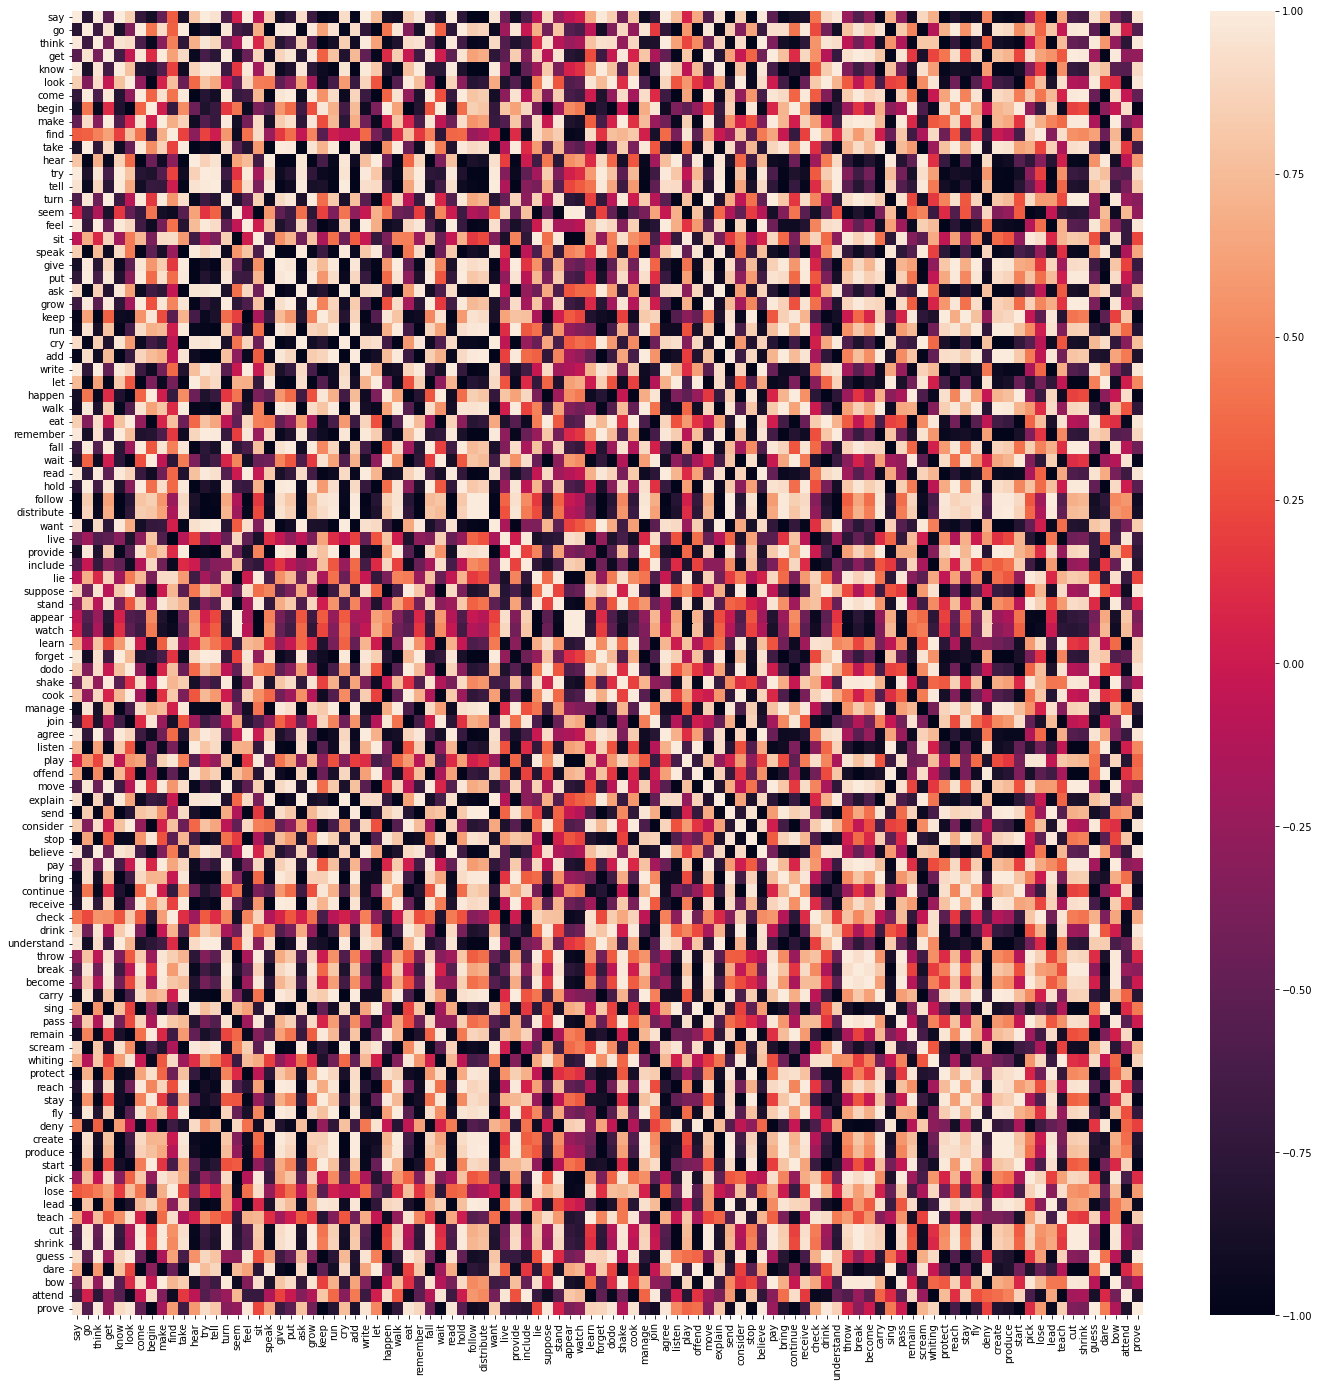

In [74]:
plt.figure(figsize = (24,24))
hm = sns.heatmap(df_2)
hm